<a href="https://colab.research.google.com/github/oramirezperera/Vectors_linear_algebra/blob/main/linear_regressionGO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('income_db_gorg.csv')

What's the data in the df?

In [6]:
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


Which is the size of the data?

In [7]:
len(df) * len(df.columns)

617994

In [8]:
len(df)

32526

Our regressors are lat and lon

and our independent variable is

mean

to do this we will need $\beta$ and $v$ but we will assume that they were given, later we will calculate them. 

$$ v = 30980.48, \qquad \boldsymbol{\beta} = \begin{bmatrix}744.83 \\ -83.45\end{bmatrix} $$

Now we can calculate $\hat{y}_{i} = \mathbf{x}^{T}_{i} \boldsymbol{\beta} + v$
and make predictions


In [9]:
def pred(x):
  beta = np.array([744.83, -83.45])
  v = 30980.48
  return x@beta+v

In [23]:
df

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32521,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649,13729,37977,1321.278082
32522,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
32523,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
32524,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000


In [11]:
type(df['Lat'])

pandas.core.series.Series

In [12]:
df['Lat'].values

array([30.77145  , 31.708516 , 33.191452 , ..., 18.3565654, 18.4120413,
       18.4780938])

In [13]:
type(df['Lat'].values)

numpy.ndarray

In [14]:
X = df[['Lat', 'Lon']].values

In [15]:
type(X)

numpy.ndarray

In [17]:
X

array([[ 30.77145  , -88.079697 ],
       [ 31.708516 , -85.611039 ],
       [ 33.191452 , -86.615618 ],
       ...,
       [ 18.3565654, -67.180686 ],
       [ 18.4120413, -67.2134127],
       [ 18.4780938, -67.1604529]])

In [18]:
Y_hat = pred(X)

In [19]:
Y_hat

array([61250.22981815, 61742.17517683, 62930.54251526, ...,
       50259.22885358, 50303.28001129, 50348.05839956])

In [20]:
Y = df['Mean'].values

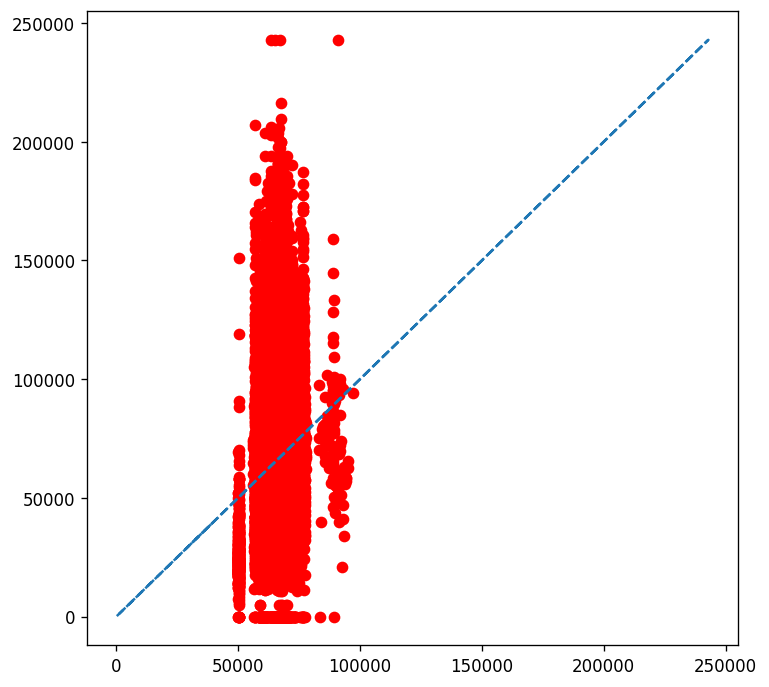

In [21]:
fig, ax = plt.subplots(1,1,figsize=(7,7), dpi=120)

ax.scatter(Y_hat, Y, marker='o', color='red')
ax.plot(Y,Y, ls='--')
plt.show()

As we can see the red dots doesn't follow the line, so there's a problem with our model. We have to change our parameters

What if we try again but with zip code and this new values $$ v = 4152.02, \qquad \boldsymbol{\beta} = \begin{bmatrix}6.55490348e+02 \\ 5.75918372e+02 \\ -2.94216316e-01\end{bmatrix}$$

In [22]:
def predict(x):
  beta = np.array([6.55490348e+02, 5.75918372e+02, -2.94216316e-01])
  v = 4152.02
  return x@beta+v

In [24]:
X_withzp = df[['Lat', 'Lon', 'Zip_Code']].values

In [25]:
X_withzp

array([[ 3.07714500e+01, -8.80796970e+01,  3.66110000e+04],
       [ 3.17085160e+01, -8.56110390e+01,  3.60480000e+04],
       [ 3.31914520e+01, -8.66156180e+01,  3.50510000e+04],
       ...,
       [ 1.83565654e+01, -6.71806860e+01,  6.02000000e+02],
       [ 1.84120413e+01, -6.72134127e+01,  6.02000000e+02],
       [ 1.84780938e+01, -6.71604529e+01,  6.03000000e+02]])

In [26]:
Y_hat_zp = predict(X_withzp)

In [27]:
Y_hat_zp

array([-37175.8607786 , -34974.23377787, -34287.40537834, ...,
       -22683.13809106, -22665.62208185, -22592.11900016])

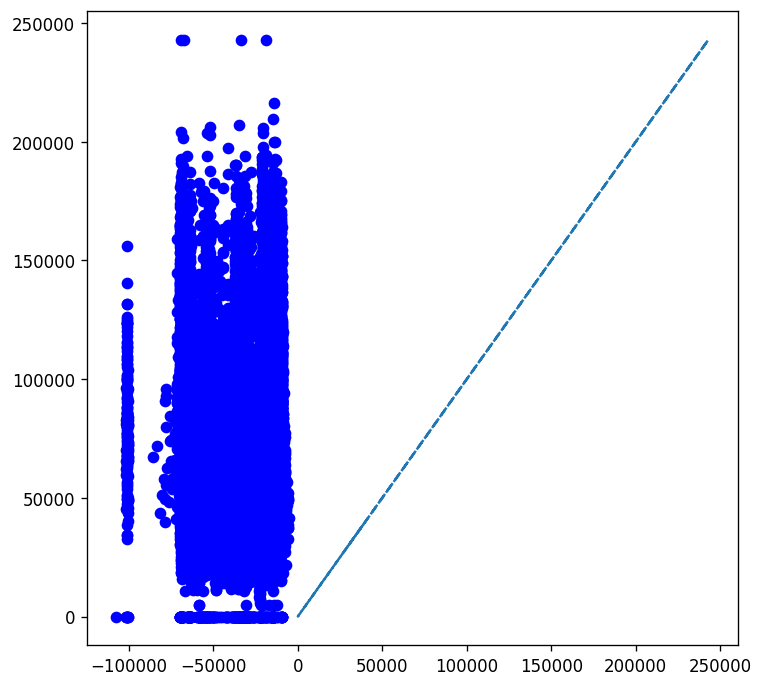

In [28]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(Y_hat_zp, Y, marker='o', color='blue')
ax.plot(Y,Y, ls='--')
plt.show()

Well, with the new parameters it's even worst